In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
#Using a function from the internet, suitably credited
"""
Created on Fri Jul 12 14:04:23 2019
@author: artmenlope
"""

import numpy as np
import matplotlib.pyplot as plt




def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:
        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

Sir, I've tried to answer all the questions to the best of my understanding for the various possible interpretations of the questions. As this is my first time using python in more than a year - wherein I stuck
exclusively to Mathematica - I apologize if my code is verbose or not properly formatted. This is in effect my first 'real' coding exercise, so please be a little lenient towards me.

Exercise 1

In [3]:
#Defining the function
def f(x,y):
    X = np.array([x,y]);
    val = 0.1*((x-1)**4) + 0.9*(y**4) + np.transpose(X-np.array([2,1])).dot(np.array([[4,1],[1,4]]).dot(X - np.array([2,1]))) + np.transpose(np.array([2,-1])).dot(X)
    return val

In [4]:
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = f(a,b)


3D Line Plot

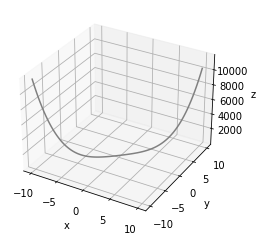

In [5]:
#Creating a 3D line plot

#Initializing a matrix to store the Z values
z1 = np.zeros(100)

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    a = x[i]
    b = y[i]
    z1[i] = f(a,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z1, 'gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

3D Contour Plot

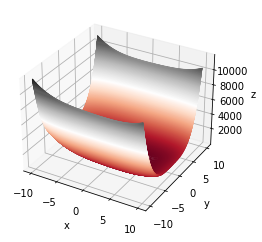

In [6]:
#Plotting the Contour plot of the Function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='RdGy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

2D Contour Plot

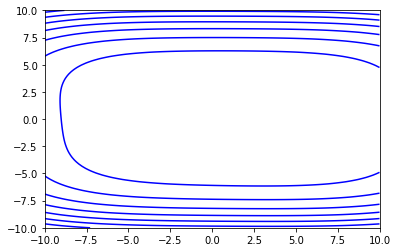

In [7]:
#Contour Plot
plt.contour(X, Y, z, colors='blue');

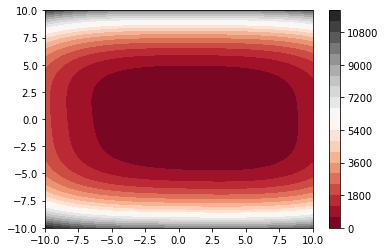

In [8]:
#A more informative contour plot, complete with color bar
plt.contourf(X, Y, z, 20, cmap='RdGy')
plt.colorbar();

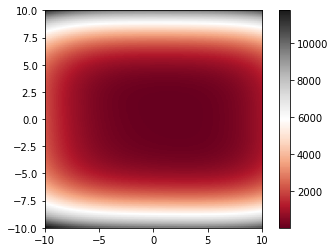

In [9]:
#An even more informative contour plot eliminating the discretization of colours as seen above
plt.imshow(z, extent=[-10, 10, -10, 10], origin='lower',
           cmap='RdGy')
plt.colorbar()


3D Scatter plot with contour plot

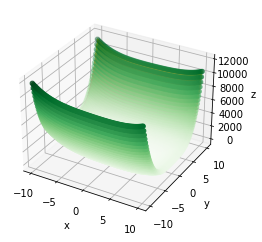

In [10]:
#Superimposing a 3D scatter Plot of all mesh points with the 3D contour plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


ax.scatter3D(X, Y, z, c=z, cmap='Greens');

Exercise 2

Defining Functions

In [11]:
#Defining the error function
def ErrorFunc(x_1,x_2,a,b):
    
    err = a*x_1 + x_2 - b
    return err

#Defining the objective function
def ObjFunc(x_1,x_2,arrA,arrB):
    sumval = 0
    for pts in zip(arrA,arrB):
        sumval +=( ErrorFunc(x_1,x_2,pts[0],pts[1]))**2
    return sumval


        

Defining Datasets

In [12]:
#Datasets - 

#Dataset 1
A1arr = np.arange(0, 5, 0.5)
tempB1arr = [2,1,4,3,6,5,8,7,10,9]
B1arr = [float(x) for x in tempB1arr]

#Dataset 2

A2arr = np.arange(0, 5, 0.5)
B2arr = np.array([2,3,4,5,6,7,8,9,10,1])
print

#Dataset 3
np.random.seed(30)
A3arr = np.arange(0, 5, 0.5)
B3arr = np.random.randint(0,100,10)

#Dataset 4
np.random.seed(40)
A4arr = np.arange(0, 5, 0.5)
B4arr = np.random.randint(0,100,10)

#Dataset 5
np.random.seed(500)
A5arr = np.arange(0, 5, 0.5)
B5arr = np.random.randint(0,100,10)

#Defining x_1, x_2
x_1 = np.linspace(-10000,10000,100)
x_2 = np.linspace(-10000,10000,100)
data1_z = [ObjFunc(x11,y11,A1arr,B1arr) for (x11,y11) in zip(x_1,x_2)]
data2_z = [ObjFunc(x12,y12,A2arr,B2arr) for (x12,y12) in zip(x_1,x_2)]
data3_z = [ObjFunc(x13,y13,A3arr,B3arr) for (x13,y13) in zip(x_1,x_2)]
data4_z = [ObjFunc(x14,y14,A4arr,B4arr) for (x14,y14) in zip(x_1,x_2)]
data5_z = [ObjFunc(x15,y15,A5arr,B5arr) for (x15,y15) in zip(x_1,x_2)]


Part 1

Dataset 1

In [13]:
#Line Plot

Text(0.5, 0, 'f(x_1,x_2)')

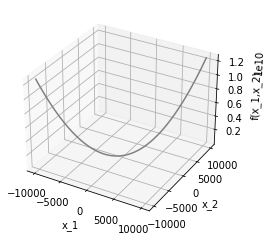

In [14]:
#Dataset 1
ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data1_z,'gray')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

In [15]:
#Contour Plot

Text(0.5, 0, 'f(x_1,x_2)')

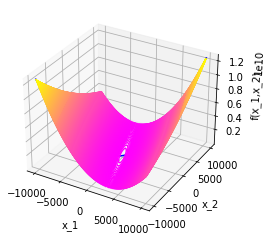

In [16]:
#Contour Plot
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10000,10000,100)
y = np.linspace(-10000,10000,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A1arr,B1arr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data1_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


Dataset 2

In [17]:
#Line Plot

Text(0.5, 0, 'f(x_1,x_2)')

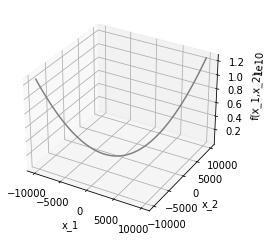

In [18]:
#Dataset 2
ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data2_z,'gray')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

In [19]:
#Contour Plot

Text(0.5, 0, 'f(x_1,x_2)')

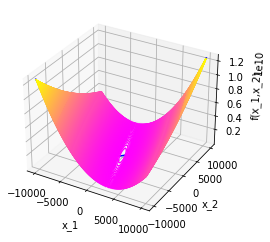

In [20]:
#Contour Plot
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10000,10000,100)
y = np.linspace(-10000,10000,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A2arr,B2arr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data2_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


Dataset 3

In [21]:
#Line Plot

Text(0.5, 0, 'f(x_1,x_2)')

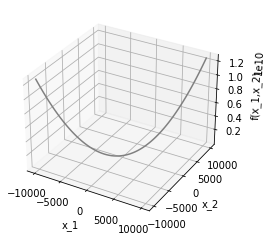

In [22]:
#Dataset 3
ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data3_z,'gray')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

In [23]:
#Contour Plot

Text(0.5, 0, 'f(x_1,x_2)')

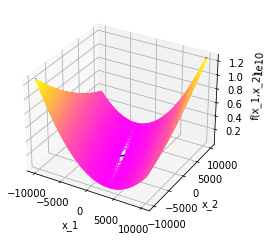

In [24]:
#Contour Plot
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10000,10000,100)
y = np.linspace(-10000,10000,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A3arr,B3arr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data3_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


Dataset 4

In [25]:
#Line Plot

Text(0.5, 0, 'f(x_1,x_2)')

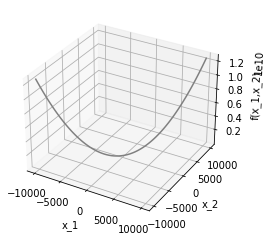

In [26]:
#Dataset 4
ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data4_z,'gray')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

In [27]:
#Contour Plot

Text(0.5, 0, 'f(x_1,x_2)')

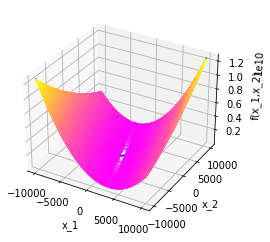

In [28]:
#Contour Plot
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10000,10000,100)
y = np.linspace(-10000,10000,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A4arr,B4arr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data4_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


Dataset 5

In [29]:
#Line Plot

Text(0.5, 0, 'f(x_1,x_2)')

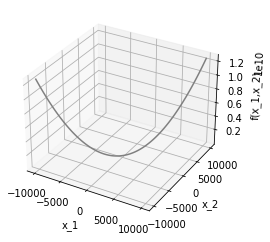

In [30]:
#Dataset 5
ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data5_z,'gray')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

In [31]:
#Contour Plot

Text(0.5, 0, 'f(x_1,x_2)')

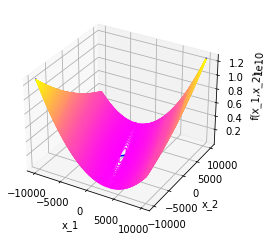

In [32]:
#Contour Plot
#Creating a 1D array of X and Y coordinates
x = np.linspace(-10000,10000,100)
y = np.linspace(-10000,10000,100)

#Creating a 2D mesh of coordinates from the 1D X and Y axes
X, Y = np.meshgrid(x,y)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A5arr,B5arr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data5_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


Part 2 - Positive Constraints

Part 2 and 3 have ambiguities in the question - 
f(x1,x2) is a 3D function, but fill_between is only applicable to 2d plots.
Thus, I've plotted the lines with shading as a 2d plot, plotted only f as a 3D plot, plotted the lines and f as a 3D plot
and also plotted f as a 3D contour along with the lines in a 3D plot - effectively covering all possible interpretations
of the question given the constraint - "Make a 3D Plot" and "Use fill_between"

Also, plotting the regions as planes on a 3D plot would result in the intersection of 10 planes, and is effectively incomprehensible. Thus, I have chosen to represent the constraints for positivity (and later negativity) as lines in the z=0 plane, with the understanding that the highlighted region is the valid region for all z in the real set. I have drawn the actual planes in a subplot, as shown below. I have tried to make the output easy to understand, and chose to represent it in multiple subplots for this reason.

Dataset 1

Text(0.5, 0, 'Objective Function')

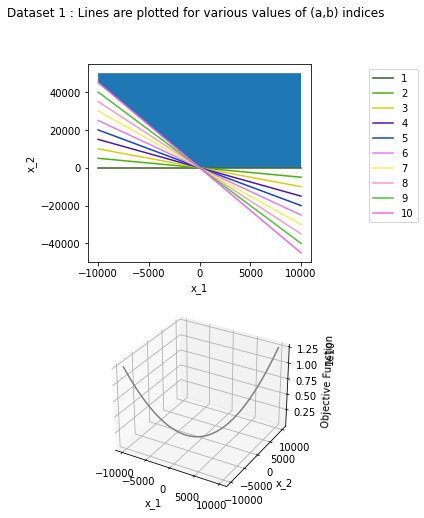

In [33]:
#Plotting in a 2D plane

temp = np.zeros(100)

#Dataset 1
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B1arr[i] - A1arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 1 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = max([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, 50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data1_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


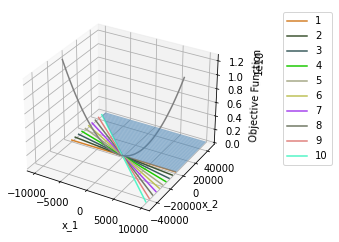

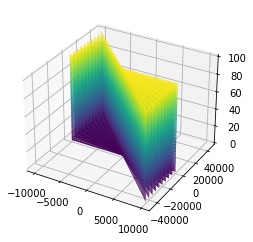

In [34]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data1_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B1arr[i] - X*A1arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


In the above figure, the constraints are plotted only as lines in the z=0 plane for readability. In reality, each of these lines represents a plane passing through the given line perpendicular to the (x_1,x_2) plane

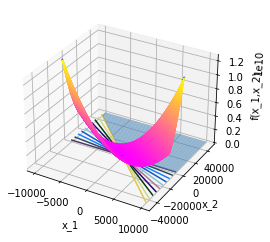

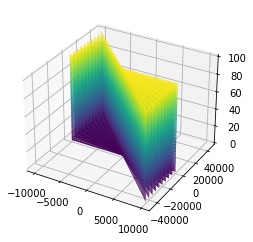

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A1arr,B1arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data1_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B1arr[i] - X*A1arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Some extra analysis for extra credit - the growth of each individual error function, done only for this dataset to preserve space

Text(0.5, 0, 'Combined Plot')

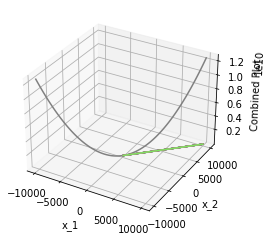

In [36]:
# Showing how the error function grows along a line

#Dataset 1
z_valA1 = np.zeros((10,100))
z_valA1_clipped = np.zeros((10,100))
X1, Y1 = np.meshgrid(x_1,x_2)
zero_mat = np.zeros((100,100))
for i in range(10):
        z_valA1[i] =  [ErrorFunc(x,y,A2arr[i],B2arr[i]) for (x,y) in zip(x_1,x_2)]
        for j in range(100):
            if z_valA1[i][j]<0:
                z_valA1_clipped[i][j] = np.NaN
            else:
                z_valA1_clipped[i][j] = z_valA1[i][j]

ax = plt.axes(projection = '3d')
ax.plot3D(x_1,x_2,data1_z,'gray')
#ax.plot_surface(X1,Y1,zero_mat)
ax.plot
for i in range(10):
    ax.plot3D(x_1,x_2,z_valA1_clipped[i],c=np.random.rand(3,))

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Combined Plot') 

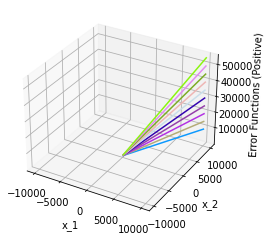

In [37]:
#Due to the size of the optimisation fucntion, the other lines get plotted extremely close to each other. 
#They are shown here without plotting the optimisation function f.
ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions (Positive)') 
for i in range(10):
    ax.plot3D(x_1,x_2,z_valA1_clipped[i],c=np.random.rand(3,))

Dataset 2

Text(0.5, 0, 'Objective Function')

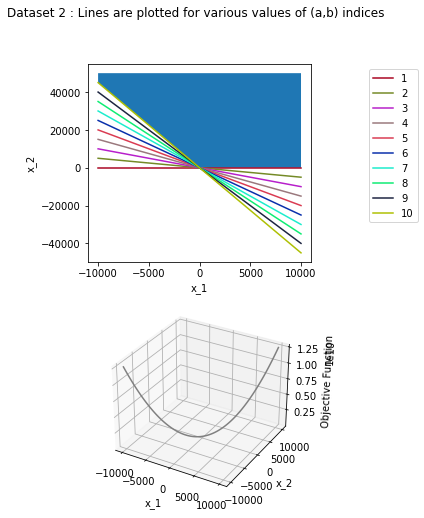

In [38]:

x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B2arr[i] - A2arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 2 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
for j in range(100):
    temp[j] = max([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, 50000)


for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data2_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


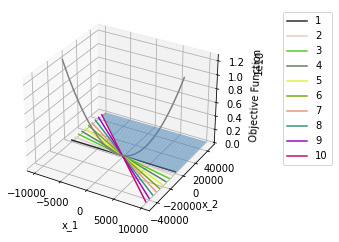

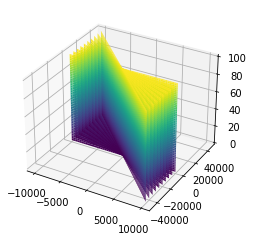

In [39]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data2_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B2arr[i] - X*A2arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


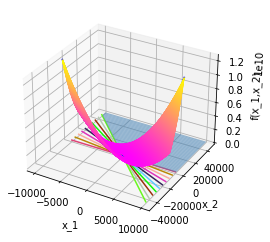

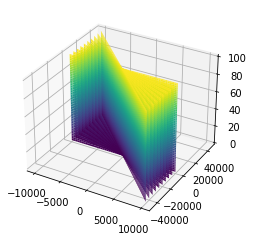

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A2arr,B2arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data2_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B2arr[i] - X*A2arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


Dataset 3

Text(0.5, 0, 'Objective Function')

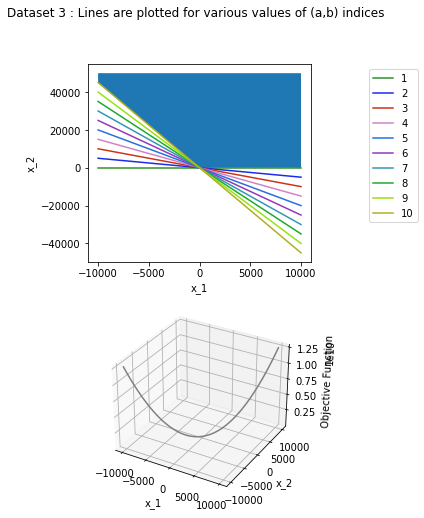

In [41]:

x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B3arr[i] - A3arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 3 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = max([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, 50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data3_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 




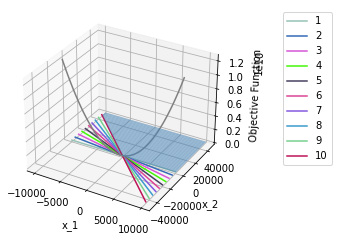

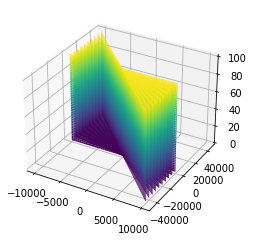

In [42]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 



for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data3_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B3arr[i] - X*A3arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


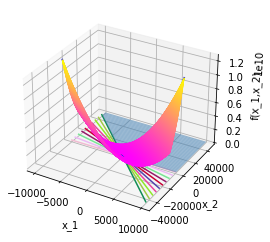

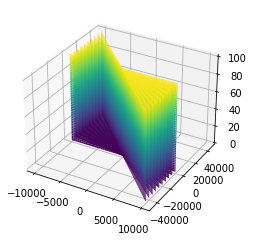

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A3arr,B3arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data3_z,'blue')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)


ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B3arr[i] - X*A3arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Dataset 4

Text(0.5, 0, 'Objective Function')

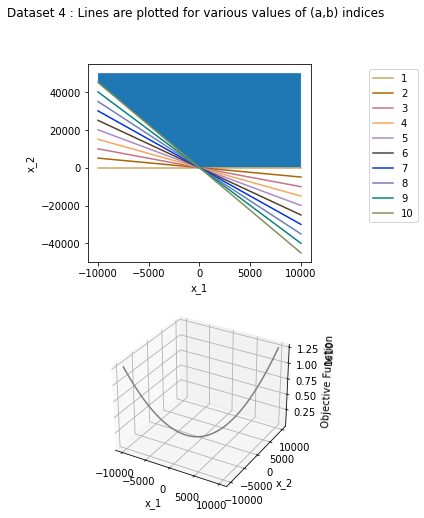

In [44]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B4arr[i] - A5arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 4 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')



for j in range(100):
    temp[j] = max([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, 50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    # ax.fill_between(x_2D,y_1[s],50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data4_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

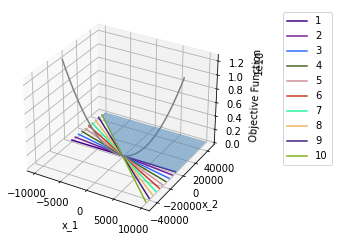

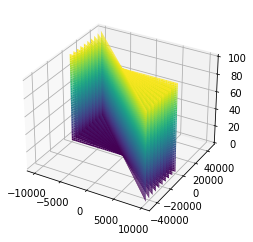

In [45]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data4_z,'gray')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)


ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B4arr[i] - X*A4arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

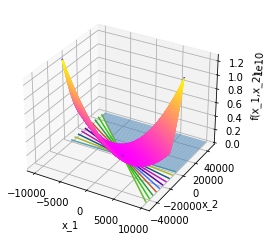

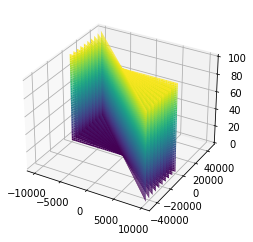

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A4arr,B4arr)


#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data4_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B4arr[i] - X*A4arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Dataset 5

Text(0.5, 0, 'Objective Function')

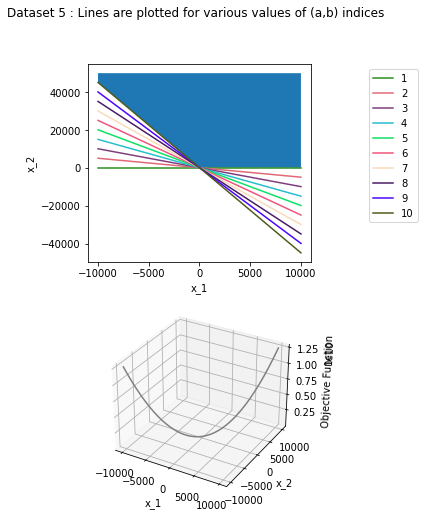

In [47]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B5arr[i] - A5arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 5 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = max([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, 50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data5_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 



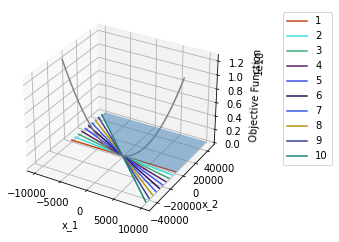

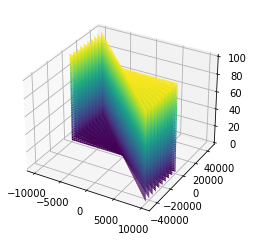

In [48]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')


for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data5_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B5arr[i] - X*A5arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

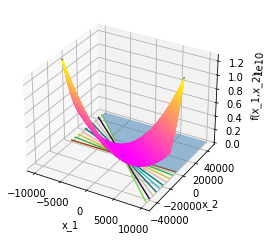

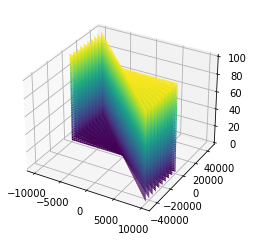

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A5arr,B5arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data5_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = max([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower

fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B5arr[i] - X*A5arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


Part 3 - Negative Constraint

Dataset 1

Text(0.5, 0, 'Objective Function')

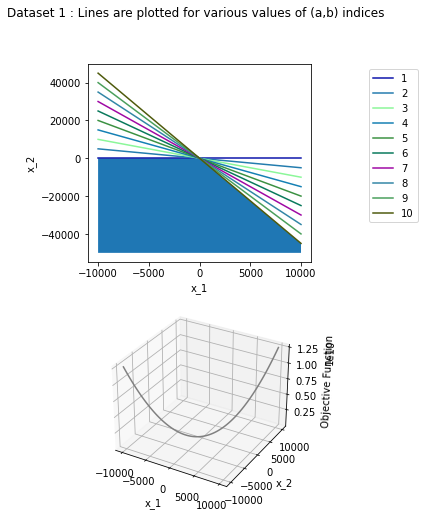

In [50]:
#Plotting in a 2D plane

#Dataset 1
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B1arr[i] - A1arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 1 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = min([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, -50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],-50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data1_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

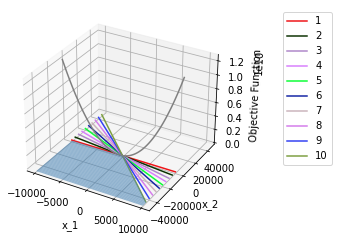

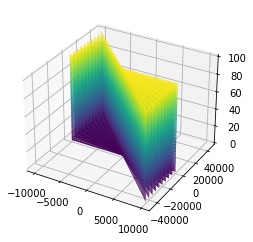

In [51]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data1_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B1arr[i] - X*A1arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')


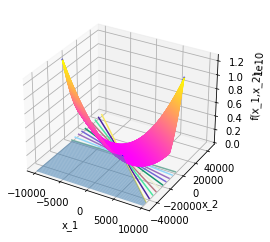

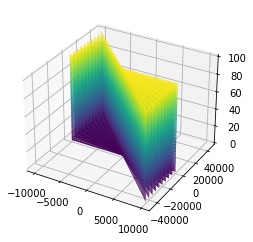

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A1arr,B1arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data1_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)


xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B1arr[i] - X*A1arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Dataset 2

Text(0.5, 0, 'Objective Function')

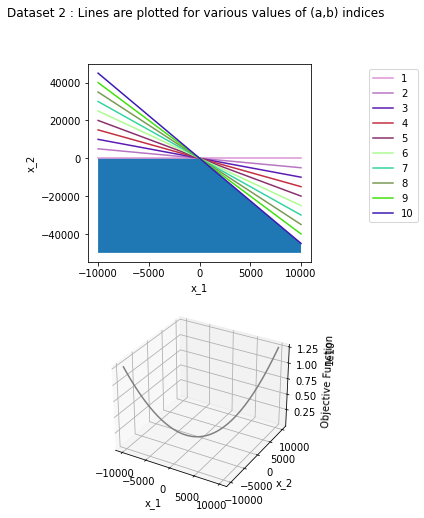

In [53]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B2arr[i] - A2arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 2 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = min([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, -50000)
for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],-50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data2_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


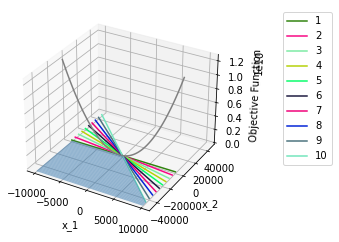

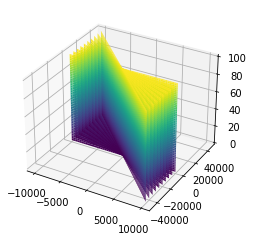

In [54]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)
ax.plot3D(x_1,x_2,data2_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B2arr[i] - X*A2arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

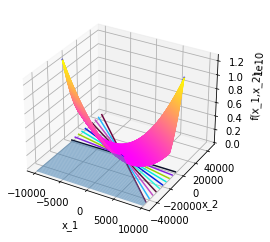

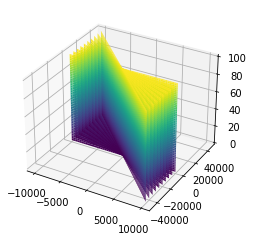

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A2arr,B2arr)



#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data2_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')


xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B2arr[i] - X*A2arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Dataset 3

Text(0.5, 0, 'Objective Function')

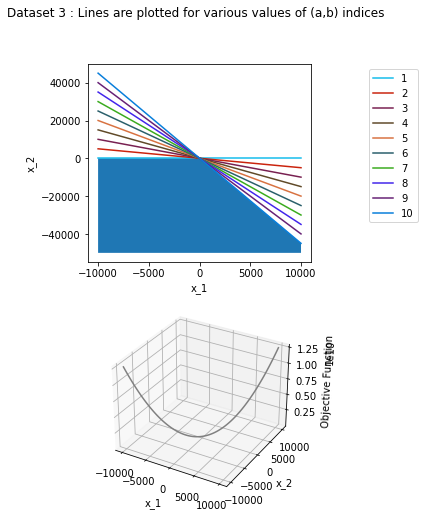

In [56]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B3arr[i] - A3arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 3 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
for j in range(100):
    temp[j] = min([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, -50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],-50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data3_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 



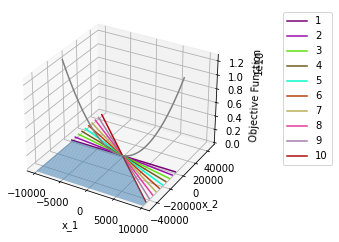

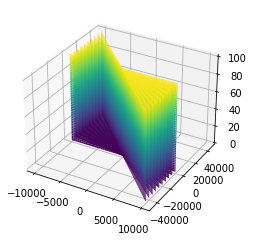

In [57]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data3_z,'gray')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B3arr[i] - X*A3arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

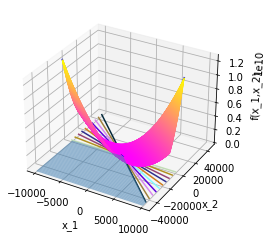

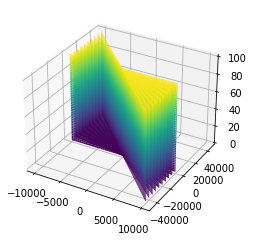

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A3arr,B3arr)


#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)
ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data3_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B3arr[i] - X*A3arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

Dataset 4

Text(0.5, 0, 'Objective Function')

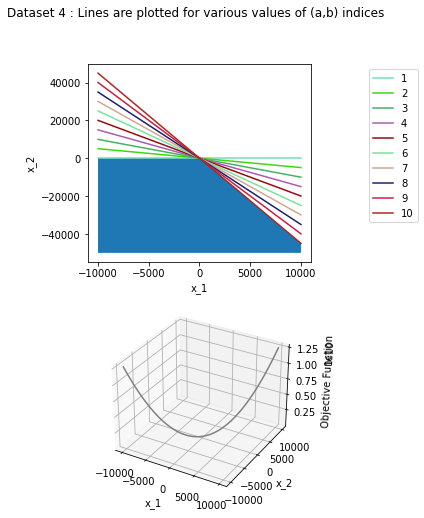

In [59]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B4arr[i] - A5arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 4 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

for j in range(100):
    temp[j] = min([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, -50000)
for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
   # ax.fill_between(x_2D,y_1[s],-50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data4_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

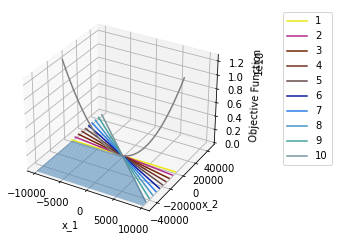

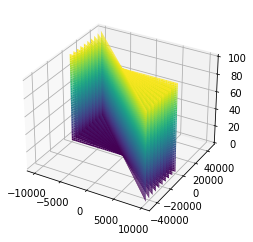

In [60]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Error Functions') 

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data4_z,'gray')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B4arr[i] - X*A4arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')

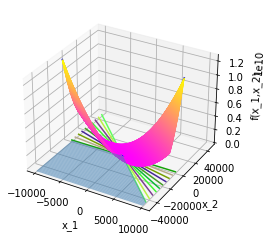

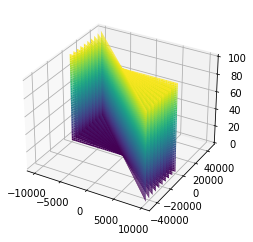

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A4arr,B4arr)

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data4_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)')

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B4arr[i] - X*A4arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')
    

Dataset 5

Text(0.5, 0, 'Objective Function')

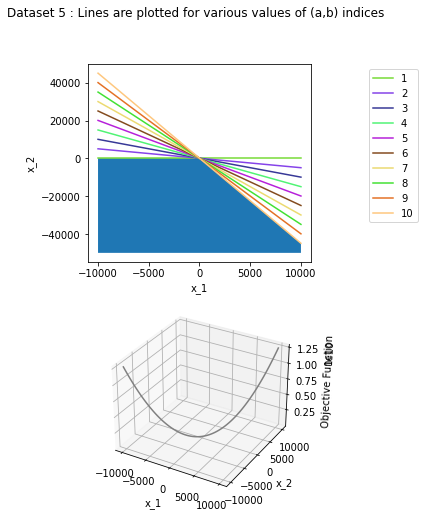

In [62]:
x_2D = np.linspace(-10000,10000,100)
y_1 = np.zeros((10,100))
for i in range(10):
    for j in range(100):
        y_1[i][j] = B5arr[i] - A5arr[i]*x_2D[j]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('Dataset 5 : Lines are plotted for various values of (a,b) indices')
ax = fig.add_subplot(2, 1, 1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
for j in range(100):
    temp[j] = min([y_1[s][j] for s in range(10)])
ax.fill_between(x_2D, temp, -50000)

for s in range(10):
    ax.plot(x_2D,y_1[s], c=np.random.rand(3,), label = s+1)
    #ax.fill_between(x_2D,y_1[s],-50000)
    

ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.plot3D(x_1,x_2,data5_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function') 


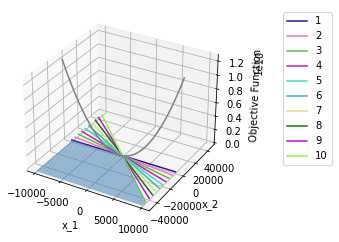

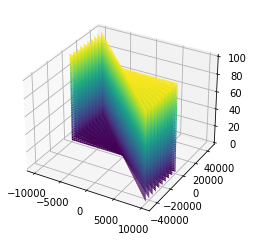

In [63]:
#Plotting the lines in a 3D plane

ax = plt.axes(projection = '3d')


for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)
    
ax.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
    

ax.plot3D(x_1,x_2,data5_z,'gray')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('Objective Function')


#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B5arr[i] - X*A5arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')
    

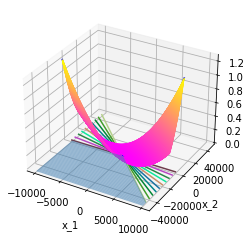

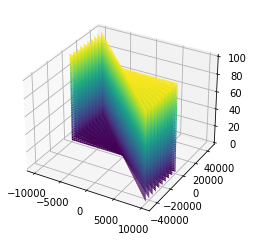

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for s in range(10):
    ax.plot3D(x_2D,y_1[s],np.zeros(100), c=np.random.rand(3,), label = s+1)

#Initializing a matrix to store the Z values
z = np.zeros((100,100))

#Evaluating Z values at each coordinate on the grid and updating the z matrix
for i in  range(x.size):
    for j in range(y.size):
        a = X[i][j]
        b = Y[i][j]
        z[i][j] = ObjFunc(a,b,A5arr,B5arr)


ax.contour3D(X, Y, z, 1000, cmap='spring')#Decreasing the 1000 value to a 100 will show the curve on this contour more clearly
ax.plot3D(x_1,x_2,data5_z,'blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
#ax.set_zlabel('f(x_1,x_2)')

#Coordinates of the lower line to draw from = 
x_lower = np.linspace(-10000,10000,100)
z_lower = np.zeros(100)
y_lower = np.ones(100)*-50000
#Coordinates of the upper line to draw from
y_upper = np.zeros(100)
for j in range(100):
    y_upper[j] = min([y_1[s][j] for s in range(10)])
x_upper = x_lower
z_upper = z_lower


fill_between_3d(ax,x_lower,y_lower,z_lower,x_upper,y_upper,z_upper)

xs = np.linspace(-10000,10000, 100)
zs = np.linspace(0, 100, 100)

Xa, Za = np.meshgrid(xs, zs)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    Ya = B5arr[i] - X*A5arr[i]
    ax.plot_surface(Xa, Ya, Za,cmap = 'viridis')
    


Aditya Kumar, EP20B005